# Project: Wrangling and Analyze Data

## Introduction
In the following notebook we will analyze over 2000 tweets from the popular twitter page "We Rate Dogs". Through our analysis we hope to discover important insights such as which breeds of dogs have the highest ratings and which dog names are most popular, among others. 

## Data Gathering
The first step is to gather data needed from all three sources. 
First we will upload a local version of the the twitter archive into the notebook. We will name it twitter_archive

In [1]:
import pandas as pd
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Our next task is to get the [image predictions tsv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv) file which will contribute more information to our analysis. We will need to send a request to the server that holds the Tab Separated File. 

In [2]:
import requests
import os
folder_name = "new_folder"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open(os.path.join(folder_name, url.split("/")[-1]), mode = "wb") as file:
    file.write(response.content)
image_predictions = pd.read_csv("./new_folder/image-predictions.tsv", sep = "\t")
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Lastly, we need to gather more data including retweets and likes using Twitter's API Tweepy. We will first need to install it.

In [3]:
!pip install tweepy
import tweepy

In [4]:
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
consumer_token
consumer_secret
access_token
secret_access_token
bearer_token

auth = OAuthHandler(consumer_token, consumer_secret)
auth.set_access_token(access_token, secret_access_token)

api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = twitter_archive.tweet_id.values

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
tweet_json = pd.read_json("tweet_json.json", lines = True)

## Assessing Data
The focus of this section is on the quality and structural issues present in the data collected in the three dataframes: twitter_archive, image_predictions, and tweet_json.

First, we will look at the twitter_archive dataframe.

In [6]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
twitter_archive.info()
len(twitter_archive)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2356

In [8]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
twitter_archive["name"].value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Lola           10
Penny          10
Tucker         10
Bo              9
Winston         9
the             8
Sadie           8
Daisy           7
an              7
Bailey          7
Toby            7
Buddy           7
Koda            6
Dave            6
Jack            6
Bella           6
Milo            6
Rusty           6
Jax             6
Oscar           6
Scout           6
Stanley         6
Leo             6
Sammy           5
             ... 
Molly           1
Blue            1
Gòrdón          1
Sephie          1
Augie           1
Severus         1
Sandra          1
Cermet          1
Kingsley        1
space           1
Jerome          1
Christoper      1
William         1
Andru           1
Brownie         1
Chadrick        1
Gordon          1
Clybe           1
Raphael         1
Peanut          1
Grizzwald       1
Pepper          1
Bloo            1
Emma            1
Milky     

Next, our focus will be on the image_predictions dataframe

In [10]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
image_predictions["p1_dog"].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

Last, we query the tweet_json file for any quality and structural issues

In [13]:
tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [14]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

### Quality issues
1. Missing data values for the numerator rating.
2. Inconsistent denominators in the twitter_archive dataframe.
3. Numerous values of None in the twitter_archive name column.
4. 181 retweets present in twitter_archive as opposed to original tweets.
5. Wrongly spelled column headers for dog stages in twitter_archive.
6. Some names in the name column are suspiciously short and begin with lowercase characters.
7. The source column has html tags that are not necessary.
8. Missing names in the name column

### Tidiness issues
1. IDs are duplicated in the three dataframes and need to be collected in one dataframe.
2. Multiple dog stage names that need to be merged into one column.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

In [15]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_copy = image_predictions.copy()
tweet_json_copy = tweet_json.copy()


Let us drop some columns that we will not be using in the dataframes already collected


In [16]:
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [17]:
twitter_archive_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id", "timestamp", "retweeted_status_user_id", "retweeted_status_timestamp", "expanded_urls"], axis = 1, inplace = True)
image_predictions_copy.drop(["jpg_url", "img_num"], axis = 1, inplace = True)
tweet_json_copy.drop(["contributors", "created_at", "geo", "in_reply_to_user_id", "in_reply_to_user_id", "display_text_range", "entities", "extended_entities", "possibly_sensitive_appealable", "quoted_status", "quoted_status_id", "quoted_status_id_str", "source", "user"], inplace = True, axis = 1)
tweet_json_copy.drop(["in_reply_to_screen_name", "in_reply_to_status_id", "in_reply_to_status_id_str", "is_quote_status", "lang", "place", "possibly_sensitive"], axis = 1, inplace = True)
tweet_json_copy.drop(["in_reply_to_user_id_str"], axis = 1, inplace = True)
list(tweet_json_copy)

['coordinates',
 'favorite_count',
 'favorited',
 'full_text',
 'id',
 'id_str',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'truncated']

Next we merge the dataframes together. We will do so using the tweet_id column. First, we will rename the "id" column in tweet_json to "tweet_id".

In [18]:
# twitter_archive_clean.head(1)
# image_predictions_copy.head(1)
# tweet_json_copy["id"] = (tweet_json_copy["id_str"])
tweet_json_copy.rename(columns = {"id": "tweet_id"}, inplace = True)


Now, we merge all three dataframes

In [19]:
df_final = pd.merge(twitter_archive_clean, image_predictions_copy, on = "tweet_id", how = "outer")
df_final = pd.merge(df_final, tweet_json_copy, on = "tweet_id", how = "outer")
df_final.head(1)

,tweet_id,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p3_dog,coordinates,favorite_count,favorited,full_text,id_str,retweet_count,retweeted,retweeted_status,truncated
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,None,None,None,...,False,NaN,39467.0,False,This is Phineas. He's a mystical boy. Only eve...,8.924206e+17,8853.0,False,NaN,False


Now, let's fix the issues with the final dataframe

In [20]:
df_final.head(1)

,tweet_id,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p3_dog,coordinates,favorite_count,favorited,full_text,id_str,retweet_count,retweeted,retweeted_status,truncated
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,None,None,None,...,False,NaN,39467.0,False,This is Phineas. He's a mystical boy. Only eve...,8.924206e+17,8853.0,False,NaN,False


### Issue #1: 

#### Define:
Inconsistent denominators in the final dataframe

#### Code

In [21]:
df_final["rating_denominator"] = 10

#### Test

In [22]:
df_final["rating_denominator"].value_counts()

10    2356
Name: rating_denominator, dtype: int64

### Issue #2:

#### Define
181 retweets instead of original tweets as seen in the retweet_ids rows

#### Code

In [23]:
df_final = df_final[pd.isnull(df_final["retweeted_status_id"])]

#### Test

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 29 columns):
tweet_id               2175 non-null int64
source                 2175 non-null object
text                   2175 non-null object
retweeted_status_id    0 non-null float64
rating_numerator       2175 non-null int64
rating_denominator     2175 non-null int64
name                   2175 non-null object
doggo                  2175 non-null object
floofer                2175 non-null object
pupper                 2175 non-null object
puppo                  2175 non-null object
p1                     1994 non-null object
p1_conf                1994 non-null float64
p1_dog                 1994 non-null object
p2                     1994 non-null object
p2_conf                1994 non-null float64
p2_dog                 1994 non-null object
p3                     1994 non-null object
p3_conf                1994 non-null float64
p3_dog                 1994 non-null object
coordinates    

### Issue #3:

#### Define
Mispelled names for dog stages

#### Code

In [25]:
# df_final.head(1)
df_final.rename(columns = {"floofer": "floof"}, inplace = True)

#### Code

In [26]:
list(df_final)


['tweet_id',
 'source',
 'text',
 'retweeted_status_id',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floof',
 'pupper',
 'puppo',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'coordinates',
 'favorite_count',
 'favorited',
 'full_text',
 'id_str',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'truncated']

### Issue #4:

#### Define
Suspiciously short names in name column and some names begin with lowercase letters


### Code

In [28]:
import numpy as np
import re
# we will replace all names that are "None" NaN as well as all names-
# that begin with capital letters with NaN
df_final["name"].replace("None", np.nan, inplace = True)
df_final["name"].replace("^[a-z]", np.nan, regex = True, inplace = True)

### Test

In [29]:
df_final["name"].value_counts()
# df_final["source"].head()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Lola           8
Winston        8
Sadie          8
Toby           7
Daisy          7
Bo             6
Stanley        6
Jax            6
Koda           6
Oscar          6
Bailey         6
Bella          6
Leo            5
Bentley        5
Dave           5
Rusty          5
Louis          5
Milo           5
Chester        5
Scout          5
Buddy          5
Maggie         4
Phil           4
Jeffrey        4
              ..
Bruno          1
Molly          1
Blue           1
Gòrdón         1
Sandra         1
Jebberson      1
Andy           1
Furzey         1
Jeb            1
Cermet         1
Jerome         1
William        1
Andru          1
Brownie        1
Chadrick       1
Rey            1
Gordon         1
Clybe          1
Kingsley       1
Raphael        1
Grizzwald      1
Christoper     1
Bloo           1
Emma           1
Milky          1
Harper         1
Grizz          1
Colin         

### Issue #5:

### Define
The source column has html tags which are not necessary. 

### Code

In [30]:
import re
# df_final["source"] = twitter_archive["source"]
df_final["source"] = df_final['source'].str.replace(r'<[^<>]*>', '', regex=True)

### Test

In [31]:
df_final["source"].value_counts()


Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #6:

### Define
Missing values in the rating_numerator column.

### Code


In [32]:
mean = df_final["rating_numerator"].describe()["mean"]
df_final["rating_numerator"].fillna(value = mean, inplace=True)

### Test

In [33]:
sum(df_final["rating_numerator"].isnull())

0

### Issue #7:

### Define
Change data type for tweet_id to string

### Code

In [34]:
df_final["tweet_id"] = df_final["tweet_id"].astype(str)


### Test

In [35]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 29 columns):
tweet_id               2175 non-null object
source                 2175 non-null object
text                   2175 non-null object
retweeted_status_id    0 non-null float64
rating_numerator       2175 non-null int64
rating_denominator     2175 non-null int64
name                   1391 non-null object
doggo                  2175 non-null object
floof                  2175 non-null object
pupper                 2175 non-null object
puppo                  2175 non-null object
p1                     1994 non-null object
p1_conf                1994 non-null float64
p1_dog                 1994 non-null object
p2                     1994 non-null object
p2_conf                1994 non-null float64
p2_dog                 1994 non-null object
p3                     1994 non-null object
p3_conf                1994 non-null float64
p3_dog                 1994 non-null object
coordinates   

### Issue #8:

#### Define

In [36]:
df_final["name"].replace("None", "No_name", inplace = True)

### Test

In [37]:
df_final["name"].value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Lola           8
Winston        8
Sadie          8
Toby           7
Daisy          7
Bo             6
Stanley        6
Jax            6
Koda           6
Oscar          6
Bailey         6
Bella          6
Leo            5
Bentley        5
Dave           5
Rusty          5
Louis          5
Milo           5
Chester        5
Scout          5
Buddy          5
Maggie         4
Phil           4
Jeffrey        4
              ..
Bruno          1
Molly          1
Blue           1
Gòrdón         1
Sandra         1
Jebberson      1
Andy           1
Furzey         1
Jeb            1
Cermet         1
Jerome         1
William        1
Andru          1
Brownie        1
Chadrick       1
Rey            1
Gordon         1
Clybe          1
Kingsley       1
Raphael        1
Grizzwald      1
Christoper     1
Bloo           1
Emma           1
Milky          1
Harper         1
Grizz          1
Colin         

### Issue #9

#### Define:
Ids are duplicated in the three dataframes

### Code:

This issue was resolved in the previous sections when merging the dataframes together

### Test:

In [38]:
sum(df_final["tweet_id"].duplicated())

0

### Issue #10

#### Define:
Multiple dog stages columns in the dataframe

#### Code:

In [40]:
import numpy as np
# first we can drop the truncated and coordinates columns because they are not useful
df_final.drop(["truncated", "coordinates"], axis = 1, inplace = True)
# we will create a new column called dog_stages and combine all the data from the 4 other dog stages
df_final["floof"].replace("None", np.nan, inplace = True)
df_final["doggo"].replace("None", np.nan, inplace = True)
df_final["pupper"].replace("None", np.nan, inplace = True)
df_final["puppo"].replace("None", np.nan, inplace = True)
df_final["dog_stages"] = df_final["floof"].combine_first(df_final["doggo"]).combine_first(df_final["pupper"]).combine_first(df_final["puppo"])
df_final.drop(["floof", "doggo", "pupper", "puppo"], axis = 1, inplace = True)


#### Test:

In [41]:
df_final["dog_stages"].value_counts()

pupper     224
doggo       86
puppo       24
floofer     10
Name: dog_stages, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [42]:
df_final.to_csv("twitter_archive_master.csv", index=False)

In [43]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id               2175 non-null object
source                 2175 non-null object
text                   2175 non-null object
retweeted_status_id    0 non-null float64
rating_numerator       2175 non-null int64
rating_denominator     2175 non-null int64
name                   1391 non-null object
p1                     1994 non-null object
p1_conf                1994 non-null float64
p1_dog                 1994 non-null object
p2                     1994 non-null object
p2_conf                1994 non-null float64
p2_dog                 1994 non-null object
p3                     1994 non-null object
p3_conf                1994 non-null float64
p3_dog                 1994 non-null object
favorite_count         2175 non-null float64
favorited              2175 non-null object
full_text              2175 non-null object
id_str                 2175 non-null float64
retweet_coun

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

Now that we have cleaned our data, we can get down to discovering some useful insights. Of key importance are the following three questions:
1. Is there a correlation between retweet_counts and favorite count. In other words, if a tweet gets many retweets does it also receive a higher favorite count?
2. Is there a positive correlation between a high rating numerator and favorite count. 
3. Lastly, we can investigate which dog names were most popular in the database.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df_twitter_data = pd.read_csv("twitter_archive_master.csv")
df_twitter_data.head(1)

,tweet_id,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,...,p3_conf,p3_dog,favorite_count,favorited,full_text,id_str,retweet_count,retweeted,retweeted_status,dog_stages
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,orange,0.097049,False,...,0.07611,False,39467.0,False,This is Phineas. He's a mystical boy. Only eve...,8.924206e+17,8853.0,False,NaN,NaN


In [45]:
# df_twitter_data.info()
# df_twitter_data["name"].value_counts()
# here we drop null values in order to avoid future errors while plotting
df_twitter_data["retweet_count"].dropna(inplace = True)
df_twitter_data["favorite_count"].dropna(inplace = True)

Text(0.5,1,'Plot of Retweet_count against Favorite_count')

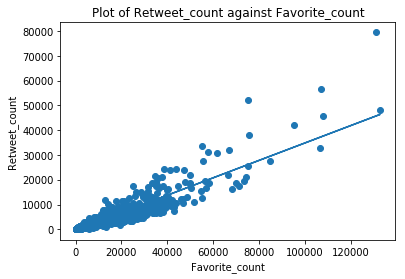

In [46]:
import numpy as np
df_favorite_count = np.array(df_twitter_data["favorite_count"])
df_retweet_count = np.array(df_twitter_data["retweet_count"])
a, b = np.polyfit(df_favorite_count, df_retweet_count, 1)
plt.scatter(df_favorite_count, df_retweet_count);
plt.plot(df_favorite_count, a * df_favorite_count + b)
plt.xlabel("Favorite_count")
plt.ylabel("Retweet_count")
plt.title("Plot of Retweet_count against Favorite_count")

In this case, it is important to reove outliers in order to get a better visual feel. This code is courtesy of "geeksforgeeks".

In [47]:
df_remove_outliers = df_twitter_data.copy()
Q1 = np.percentile(df_remove_outliers["rating_numerator"], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(df_remove_outliers["rating_numerator"], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
upper = np.where(df_remove_outliers["rating_numerator"] >= (Q3+1.5*IQR))
lower = np.where(df_remove_outliers["rating_numerator"] <= (Q1-1.5*IQR))
df_remove_outliers.drop(upper[0], inplace = True)
df_remove_outliers.drop(lower[0], inplace = True)
df_remove_outliers["rating_numerator"].value_counts()
#This code is courtesy of "geeksforgeeks".

12    500
10    442
11    426
13    307
9     156
8      98
14     43
Name: rating_numerator, dtype: int64

Text(0.5,1,'Plot of Rating_numerator against Favorite_count')

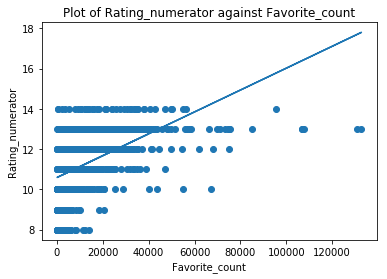

In [48]:
df_remove_outliers["rating_numerator"].dropna(inplace = True)
df_remove_outliers["favorite_count"].dropna(inplace = True)
df_favorite_count = np.array(df_remove_outliers["favorite_count"])
df_rating_numerator = np.array(df_remove_outliers["rating_numerator"][0:2146])
a, b = np.polyfit(df_favorite_count, df_rating_numerator, 1)
plt.scatter(df_favorite_count, df_rating_numerator);
plt.plot(df_favorite_count, a * df_favorite_count + b)   
plt.xlabel("Favorite_count")
plt.ylabel("Rating_numerator")
plt.title("Plot of Rating_numerator against Favorite_count")

In [49]:
df_twitter_data["name"].value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Lola           8
Winston        8
Sadie          8
Toby           7
Daisy          7
Bo             6
Stanley        6
Jax            6
Koda           6
Oscar          6
Bailey         6
Bella          6
Leo            5
Bentley        5
Dave           5
Rusty          5
Louis          5
Milo           5
Chester        5
Scout          5
Buddy          5
Maggie         4
Phil           4
Jeffrey        4
              ..
Bruno          1
Molly          1
Blue           1
Gòrdón         1
Sandra         1
Jebberson      1
Andy           1
Furzey         1
Jeb            1
Cermet         1
Jerome         1
William        1
Andru          1
Brownie        1
Chadrick       1
Rey            1
Gordon         1
Clybe          1
Kingsley       1
Raphael        1
Grizzwald      1
Christoper     1
Bloo           1
Emma           1
Milky          1
Harper         1
Grizz          1
Colin         

### Insights:
1. There is a positive correlation between favorite_count and retweet_count.
2. There is a high correlation between favorite_count and rating numerator.
3. We notice that the most popular name is Charlie. Let's ignore the None values as well as the single A values. 

### Visualization

Text(0.5,1,'Plot of Retweet_count against Favorite_count')

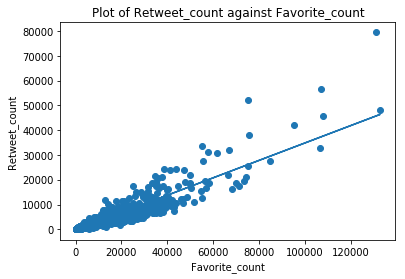

In [50]:
import numpy as np
df_favorite_count = np.array(df_twitter_data["favorite_count"])
df_retweet_count = np.array(df_twitter_data["retweet_count"])
a, b = np.polyfit(df_favorite_count, df_retweet_count, 1)
plt.scatter(df_favorite_count, df_retweet_count);
plt.plot(df_favorite_count, a * df_favorite_count + b)
plt.xlabel("Favorite_count")
plt.ylabel("Retweet_count")
plt.title("Plot of Retweet_count against Favorite_count")

Text(0.5,1,'Plot of Rating_numerator against Favorite_count')

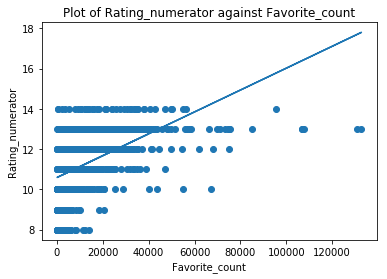

In [51]:
df_remove_outliers["rating_numerator"].dropna(inplace = True)
df_remove_outliers["favorite_count"].dropna(inplace = True)
df_favorite_count = np.array(df_remove_outliers["favorite_count"])
df_rating_numerator = np.array(df_remove_outliers["rating_numerator"][0:2146])
a, b = np.polyfit(df_favorite_count, df_rating_numerator, 1)
plt.scatter(df_favorite_count, df_rating_numerator);
plt.plot(df_favorite_count, a * df_favorite_count + b)   
plt.xlabel("Favorite_count")
plt.ylabel("Rating_numerator")
plt.title("Plot of Rating_numerator against Favorite_count")